In [ ]:
from typing import TypedDict

class Std(TypedDict):

    eng: float
    urdu: float
    maths: float

    marks_obtained: float
    percentage: float
    grade: str

    summary: str

In [ ]:
def cal_total(state: Std):
    total = state["eng"] + state["urdu"] + state["maths"]

    return {"marks_obtained":total}

def cal_percentage(state: Std):
    percentage = (state["marks_obtained"]*100)/300

    return {"percentage":percentage}

def cal_grade(state: Std):
    grade = ""
    percentage = state["eng"]
    if (percentage>=80):
        grade = "A"

    elif (percentage>=70):
        grade = "B"

    elif (percentage>=60):
        grade = "C"

    else:
        grade = "D"

    return {"grade": grade}

def summary(state: Std):
    summary = f"""
    --------Final Summary of Result--------\n
    Marks_Obtained: {state["marks_obtained"]}\n
    Percentage: {state["percentage"]}\n
    Grade: {state["grade"]}
    """

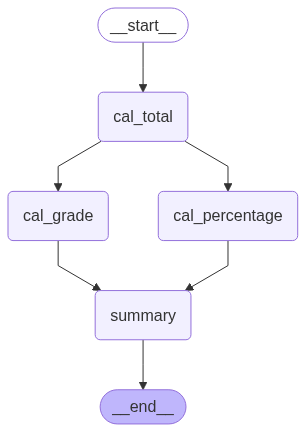

In [14]:
from langgraph.graph import StateGraph, START, END

workflow = StateGraph(Std)

workflow.add_node("cal_total", cal_total)
workflow.add_node("cal_percentage", cal_percentage)
workflow.add_node("cal_grade", cal_grade)
workflow.add_node("summary", summary)

workflow.add_edge(START, "cal_total")
workflow.add_edge("cal_total", "cal_percentage")
workflow.add_edge("cal_total", "cal_grade")
workflow.add_edge("cal_percentage", "summary")
workflow.add_edge("cal_grade", "summary")
workflow.add_edge("summary", END)

graph = workflow.compile()

graph

In [17]:
input = {
    "eng": 98.5,
    "urdu": 70,
    "maths": 91
}

graph.invoke(input)

{'eng': 98.5,
 'urdu': 70,
 'maths': 91,
 'marks_obtained': 259.5,
 'percentage': 86.5,
 'grade': 'A'}

-----------------
# Using LLM

In [1]:
from langchain.chat_models import ChatOpenAI
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field

from dotenv import load_dotenv
import os
load_dotenv()

api_key = os.getenv("OPENROUTER_API_KEY")

In [2]:
class LLM_Output(BaseModel):
    feedback: str = Field(description="The feedback on the essay")
    score: int = Field(description="Score of essasy from 1 to 10", ge=0, le=10)

parser = PydanticOutputParser(pydantic_object=LLM_Output)

# LLM via OpenRouter
llm = ChatOpenAI(
    openai_api_key=api_key,
    openai_api_base="https://openrouter.ai/api/v1",
    model="openai/gpt-4o-mini"
)

/tmp/ipykernel_9059/909817029.py:8: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(


In [55]:
essay = """
Machine Learning (ML) jobs require strong foundations in math, programming, and data handling. Professionals must build, train, and deploy models that solve real-world problems. Success in this field demands not just technical skills but also creativity, critical thinking, and the ability to work with messy, imperfect data. As AI expands, ML roles are in high demand across industries like healthcare, finance, and tech. Mastery of ML tools, ethical understanding, and continuous learning are key to long-term success in this fast-evolving job market.


"""

In [56]:
# Prompt template
prompt = f"""Analyze the essary and provide the feedback and score
Respond in this JSON format:
{parser.get_format_instructions()}
\n\n
Essay:
{essay}
"""

# Call model and parse manually
response = llm.invoke(prompt)
parsed = parser.parse(response.content)

print(parsed)


feedback='The essay provides a concise overview of the essential skills and requirements for Machine Learning jobs. It effectively highlights the importance of math, programming, and data handling, while also emphasizing the need for creativity and critical thinking. The mention of the growing demand for ML roles across various industries adds relevance to the discussion. However, the essay could benefit from specific examples or case studies to illustrate the points made and enhance engagement. Additionally, a more structured format with clear sections could improve readability.' score=7


In [57]:
parsed.score

7